#### German credit risk prediction <br>
In This dataset, each entry represents a person who takes a credit by a bank <br>
Each person is classified as good or bad credit risks according to the set of attributes<br>

#### We select several of the attributes that suitable for the prediction<br>
<ul>
    <li>Age (numeric)</li>
    <li>Sex (text:male,female)</li>
    <li>Job(numeric:0-unskilled and non resident,1-unskilled and resident,2-skilled,
        3-highly skilled)</li>
    <li>Housing(text:own,rent or free)</li>
    <li>Saving accounts(text-no saving,little,moderate,quite rich,rich)</li>
    <li>Checking account(text,no checking,little,moderate,quite rich,rich)</li>
    <li>Credit ammount(numeric, in DM)</li>
    <li>Duration(numeric, in month)</li>
    <li>Purpose(text:car,furniture/equipment,radio/TV,domestic appliances, repairs,
        education,business,vacation/others)</li>
    <li>Risk(Value target-Good or Bad Risk)</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,\
classification_report,fbeta_score

#model algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### Data Preparation

In [2]:
df=pd.read_csv("dataset/german_data.csv")
#display the dataset
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,Skilled,own,no saving,little,1169,6,radio/television,Good Risk
1,22,female,Skilled,own,little,moderate,5951,48,radio/television,Bad Risk
2,49,male,unskilled - resident,own,little,no checking,2096,12,education,Good Risk
3,45,male,Skilled,free,little,little,7882,42,furniture/equipment,Good Risk
4,53,male,Skilled,free,little,little,4870,24,car (new),Bad Risk


Check for NaN values

In [3]:
df.isnull().sum()
#the result shows that we dont have null values, which is good start

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

We create dummies variables, essentially if we just change each value of columns. For example if we encode own as 0, rent as 1 and free as 2, there is no information about the value furthermore 1 is higher than 0, but here it does not mean that

In [4]:
#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)

df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)

df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)

df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

df = df.merge(pd.get_dummies(df["Job"], drop_first=True, prefix='Job'), left_index=True, right_index=True)


We drop the categorical values since we already replace that we dummies variables

In [6]:
df.drop(['Sex','Job','Housing','Saving accounts','Checking account','Purpose'],axis=1,inplace=True)

We encode the risk as numeric Good Risk as 0 and Bad Risk as 1

In [9]:
df['Risk'].unique()

array(['Good Risk', 'Bad Risk'], dtype=object)

In [11]:
Risk={"Good Risk":0, 
     "Bad Risk":1}
df["Risk"]=df["Risk"].map(Risk)

We Plot the histogram of Risk as the target variables / class label

array([[<AxesSubplot:title={'center':'Risk'}>]], dtype=object)

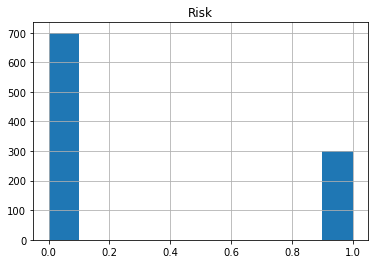

In [13]:
df.hist(column='Risk')

It seems that the class is imbalanced, we need to see how good our model in addressing this phenomena

In [17]:
#Creating the X and y variables
X = df.drop(['Risk'],axis=1)
y = df["Risk"]
seed=7
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#### Machine Learning Model

In [20]:
#We trained Logistic regression, Naive bayes, SVM, KNN and Random Forest
LR=LogisticRegression(penalty='l2',solver='liblinear')
NB=GaussianNB()
RF=RandomForestClassifier()
KNN=KNeighborsClassifier()


In [21]:
from sklearn.metrics import roc_curve

In [22]:
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

Test predict accuracy score:  0.736 

Confussion Matrix: 
 [[157  21]
 [ 45  27]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       178
           1       0.56      0.38      0.45        72

    accuracy                           0.74       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250



In [23]:
model=NB.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

Test predict accuracy score:  0.688 

Confussion Matrix: 
 [[132  46]
 [ 32  40]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       178
           1       0.47      0.56      0.51        72

    accuracy                           0.69       250
   macro avg       0.63      0.65      0.64       250
weighted avg       0.71      0.69      0.70       250



In [24]:
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

Test predict accuracy score:  0.768 

Confussion Matrix: 
 [[164  14]
 [ 44  28]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       178
           1       0.67      0.39      0.49        72

    accuracy                           0.77       250
   macro avg       0.73      0.66      0.67       250
weighted avg       0.75      0.77      0.75       250



In [25]:
model=KNN.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

Test predict accuracy score:  0.664 

Confussion Matrix: 
 [[151  27]
 [ 57  15]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       178
           1       0.36      0.21      0.26        72

    accuracy                           0.66       250
   macro avg       0.54      0.53      0.52       250
weighted avg       0.62      0.66      0.63       250



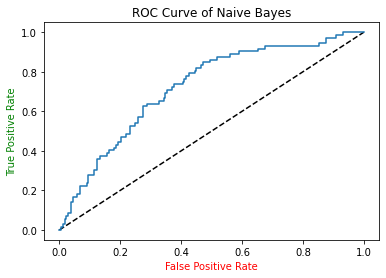

In [27]:
#we can also plot the ROC curve based on each model
#Predicting proba
y_pred_prob = NB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")
plt.title('ROC Curve of Naive Bayes')
plt.show()

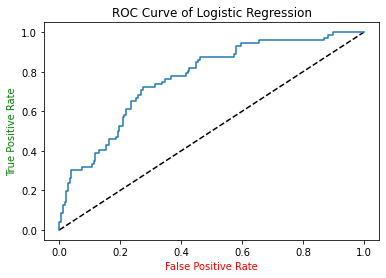

In [28]:
#we can also plot the ROC curve based on each model
#Predicting proba
y_pred_prob = LR.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")
plt.title('ROC Curve of Logistic Regression')
plt.show()

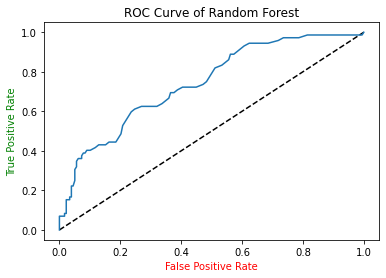

In [29]:
#we can also plot the ROC curve based on each model
#Predicting proba
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")
plt.title('ROC Curve of Random Forest')
plt.show()

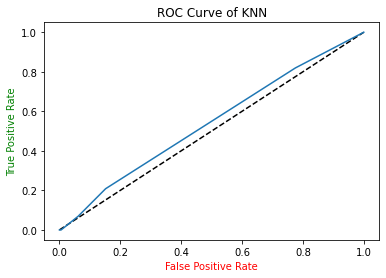

In [30]:
#we can also plot the ROC curve based on each model
#Predicting proba
y_pred_prob = KNN.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")
plt.title('ROC Curve of KNN')
plt.show()